In [8]:
import sys
sys.path.append('../')
import functions
exec(open('./functions.py').read())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
... OK (Got response in 0.57 seconds)
Writing emoji data to C:\Users\home\.demoji\codes.json ...
... OK


In [44]:
#load labelled data (generated in file 2.preprocessing)
data = pickle.load(open('data_n_models/eng_df_labelled.pkl', "rb"))
data.columns

Index(['index', 'user_id', 'user_statuses', 'name', 'tweet', 'retweets',
       'location', 'created', 'followers', 'is_user_verified',
       'favorite_count', 'in_reply_to_status_id', 'keyword', 'language',
       'clean', 'clean_vader', 'compound', 'lemma'],
      dtype='object')

# Labelling bot related tweets

After the observations of the dataset, it was noticed that there are accounts that offer special scripts to buy goods on zalando as well as tweets by users of such scripts. Since this data is not related to the goal of our project we decided to filter them out. 

It is decided that if a user name contains 'bot', 'bot_' or 'script' it is a bot tweet.
And if a tweet contains 'script','bot','bots, 'bot_', 'cook','cop' it is a bit tweet

In [45]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in data.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [46]:
#apply the function
bot_df = classify_bots(data)

C:\Anaconda\envs\uni\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4% of english tweets were classified as bots

In [47]:
#save the classified dataset
pickle.dump(bot_df, open(r'.\data_n_models\4.eng_df_bot_classified.pkl', 'wb'))

In [48]:
#count the number of bot and non bot related tweets
t = bot_df.bot.value_counts()
print(t)
t.loc[True] / (t.loc[False] + t.loc[True])

False    62536
True      2881
Name: bot, dtype: int64


0.04404053992081569

the majority of english speaking bots are about asos

         tweet
keyword       
asos      2169
bohoo        2
boohoo     133
zalando    577


<AxesSubplot:xlabel='keyword'>

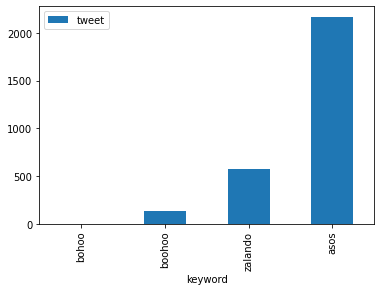

In [49]:
#print bot related tweets per company
print(bot_df[['keyword','tweet']][bot_df.bot == True].groupby(['keyword']).count())
bot_df[['keyword','tweet']][bot_df.bot == True].groupby(['keyword']).count().sort_values(by='tweet').plot.bar()

English no-bot tweets is just 3% about Zalando

         tweet
keyword       
asos     35240
bohoo      174
boohoo   24959
zalando   2163


<AxesSubplot:xlabel='keyword'>

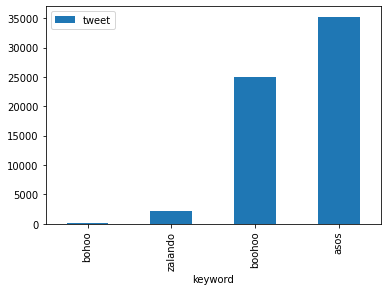

In [50]:
#print non bot related tweets per company
print(bot_df[['keyword','tweet']][bot_df.bot == False].groupby(['keyword']).count())
bot_df[['keyword','tweet']][bot_df.bot == False].groupby(['keyword']).count().sort_values(by='tweet').plot.bar()

In [51]:
#testing results by checking random 10 tweets
sample = bot_df[bot_df.bot == True].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

74758 iembot_gsp At 12:16 AM EDT, 2 W Fletcher [Henderson Co, NC] ASOS reports NON-TSTM WND GST of M47 MPH. KAVL ASOS https://t.co/gIPw4xGjmR
2372 iembot_gyx Mount Washington,NH (MWN) ASOS reports gust of 60 knots (69.1 mph) from WNW @ 1849Z -- KMWN 041849Z 30050G60KT 1/16SM FZFG BLSN VV000 M18/M18 RMK VRY LGT ICG SUN DMLY VSBL
38014 top100nowUK "ASOS" and 1 more hit the Top 100 iTunesUK Free Apps Chart! Description and more - https://t.co/vvHkdIy2NG https://t.co/9rSgljudqa
18931 tiffaimee @Hermesparcels you've sent me a new @ASOS_HeretoHelp tracking number but it doesn't exist on your website or your customer service bot chat.
69142 iembot_bis MINOT_INTL,ND (MOT) ASOS reports gust of 50 knots (57.5 mph) from W @ 0703Z -- KMOT 300754Z AUTO 28030G48KT 9SM BKN026 OVC032 M06/M12 A2953 RMK AO2 PK WND 27050/0703 SNB17E49 SLP015 P0000 T10561122
18466 iembot_ilx At 11:13 AM CDT, Peoria Intl Airport [Peoria Co, IL] ASOS reports NON-TSTM WND GST of M50 MPH https://t.co/Tuin4iSVI5
95265 iembot_t

# print 10 top likes about Zalando

issues:

1. lots of duplicates it text, but not 1-1

2. some tweets do not contain Zalando

3. still some bots 
"generate over 1000 zalando accounts in less then 4 hours!"

In [52]:
nobots = bot_df[bot_df.bot == False]

for i, value in nobots[nobots['keyword'] == 'zalando'].sort_values(by = 'compound', ascending=False)[50:66].tweet.iteritems():
    print(i, value)
    print('________________')

6628 @Irina_Vukolova
😃 And a new set of clothing, My love. To be combined with this afternoon's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🤩😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘🥰💖💗💓💕💎💍🎸🎶🌹🌹🌹
https://t.co/PFUyEg9Reu https://t.co/clwKyJKnPw
________________
28067 @Irina_Vukolova
😃 ... And a new set of dresses, My love. To be combined with this afternoon's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🥰😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘🥰💖💓💕💎💍🎸🎶🌹🌹🌹
https://t.co/ajufCwP1o1 https://t.co/uC5fFhozj2
________________
6597 @Irina_Vukolova
😃... And a new set of dresses, My love. To be combined with this morning's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🥰😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘🥰💖💗💓💕💎💍🎸🎶🌹🌹🌹
https://t.co/OjDisLqXiZ https://t.co/H5Hts7JE9I
________________
24431 @Irina_Vukolova
😃 And a new set of clothing, My love. To be combined with this morning's clothes. 
🤗😘❤ℐℓ٥ﻻﻉ√٥υ❤🥰😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙😚😘😗😙🥰💖💓💕💎💍🎸🎶🌹🌹🌹 
https://t.co/VkWf5ENauJ https://t.co/yj9f9UxnqZ
________________


# print top 10 negative tweets about zalando

issues:

1. is it bot?
__________
73907 2x 39 today on Zalando, sadly my accounts are still bad despite my best efforts 😭

Thanks @FlareAIO @flash_proxy https://t.co/enSImFj0eH



In [53]:
for i, value in nobots[nobots['keyword'] == 'zalando'].sort_values(by = 'compound', ascending=True)[:10].tweet.iteritems():
    print(i, value)
    print('________________')

87107 Fuck @Zalando @Zalando_Press ! What a negative company history and now this annoying tv commercials ! Who the hell needs that ???
________________
28119 @d0h0k1 @anchor_protocol WTF bro. This blockchain shit doesn't work. After this, I'm quitting my crypto job and applying to Zalando and Deliveroo. Fuck crypto!
________________
17230 I bought two more pairs of shoes this morning, from Zalando Lounge, for summer. Only with the new Covid numbers and slow vaccination we'll probably all sit at home. And cry. I hate the stupid selfishness of people.
________________
73907 2x 39 today on Zalando, sadly my accounts are still bad despite my best efforts 😭

Thanks @FlareAIO @flash_proxy https://t.co/enSImFj0eH
________________
35184 @Zalando Have already done so. I am really very dismayed with this terrible process; I have to *prove* that I returned the items, even though Zalando have rec'd parcel &amp; are the ones that have made the mistake. V disappointed; would not shop again at Zalan

In [54]:
nobots.lemma

0                                                 money owe
1         virtualstyle try increase conversion rate larg...
2         virtualstyle try increase conversion rate larg...
3                    problem start adida sell latex website
4                               welcome world sneer disdain
                                ...                        
106510                               dress zalando gorgeous
106519             zalandopromote rose더로즈 therose stanworld
106521             zalandopromote rose더로즈 therose stanworld
106555    aha time hear zalando be n’t bad lazy long non...
106556     zalando account restock hour ready ringed planet
Name: lemma, Length: 62536, dtype: object

In [60]:
pos_zalando = nobots[(nobots.compound >= 0.5) & (nobots.keyword == 'zalando')]

In [94]:
stopwords = set(STOPWORDS)
stopwords.update(["boohoo", "asos",'Zalando'])
str_pos_zalando = " ".join(pos_zalando.clean_vader)
str_pos_zalando = remove_stopwords(str_pos_zalando)

In [95]:
counts = nltk.FreqDist(str_pos_zalando.split())
#Get 50 Most Common Words
print(counts.most_common(50))

[('Zalando', 243), ('new', 101), ('zalando', 91), ('And', 65), ('set', 59), ('love.', 58), ('combined', 57), ('clothes.', 54), ('fashion', 40), ('growth', 37), ('like', 36), ('clothing,', 34), ('platform', 32), ('The', 31), ('support', 28), ('online', 27), ('better', 26), ('Find', 26), ('team', 25), ('it.', 24), ('company', 24), ('SAP', 24), ('learn', 23), ('Shop', 23), ('great', 22), ('love', 22), ('dresses,', 22), ('million', 21), ('good', 21), ('Thanks', 21), ("afternoon's", 21), ('Alejandro', 21), ('Basterrechea,', 21), ('Head', 21), ('Procurement', 21), ('Excellence', 21), ('Coupa', 21), ('saying', 21), ('digitaleconomy', 21), ('traditional', 21), ('procurement', 21), ('organizations', 21), ('bsm', 21), ('spendsetters', 21), ('Zalando,', 20), ('success', 20), ('hit', 20), ('Spendsetter', 20), ('help', 19), ('serve', 19)]


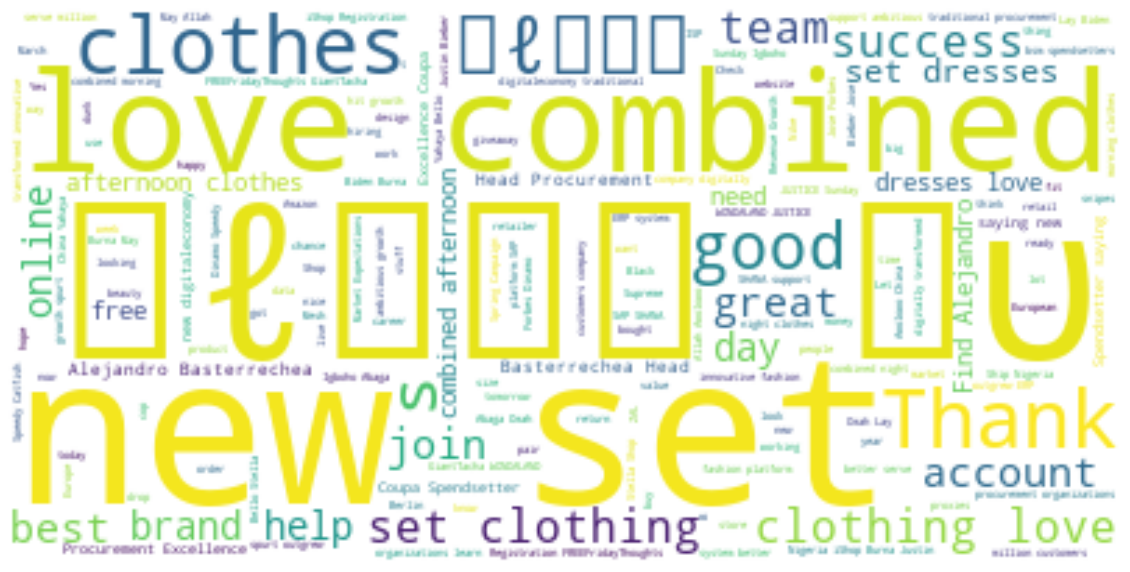

In [96]:
stopwords = set(STOPWORDS)
stopwords.update(["boohoo", "asos",'zalando', 'face'])
plt.figure(figsize=(20,20))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str_pos_zalando)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()